In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
student_performance = pd.read_csv('C:\\Users\\dhruv\\Downloads\\StudentsPerformance.csv')

In [180]:
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [170]:
student_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
#Find the average score group wise for males and females separately.
df = student_performance.loc[:,['gender','race/ethnicity','math score','reading score','writing score']]
df.groupby(['gender','race/ethnicity']).mean()

math score  reading score  writing score
gender race/ethnicity                                          
female group A          58.527778      69.000000      67.861111
       group B          61.403846      71.076923      70.048077
       group C          62.033333      71.944444      71.777778
       group D          65.248062      74.046512      75.023256
       group E          70.811594      75.840580      75.536232
male   group A          63.735849      61.735849      59.150943
       group B          65.930233      62.848837      60.220930
       group C          67.611511      65.424460      62.712230
       group D          69.413534      66.135338      65.413534
       group E          76.746479      70.295775      67.394366

In [63]:
#Find the % of males scoring above 80 in math and 85 in reading group wise under [parental level of education as bachelor degree


In [116]:
#Find the count of males under group E that are either having parental level of education as high school or under bachelor degree program
df = student_performance.groupby('gender')
df_sub = df.get_group('male').groupby('race/ethnicity').get_group('group E')
lis = ["bachelor's degree",'high school']
print("The count of males under group E that are either having parental level of education as high school or under bachelor degree program")
len(df_sub[df_sub['parental level of education'].apply(lambda x: True if x in lis else False)])

The count of males under group E that are either having parental level of education as high school or under bachelor degree program


18

                math score  reading score  writing score
race/ethnicity                                          
group A                100            100             97
group B                 97             97             96
group C                 98            100            100
group D                100            100            100
group E                100            100            100


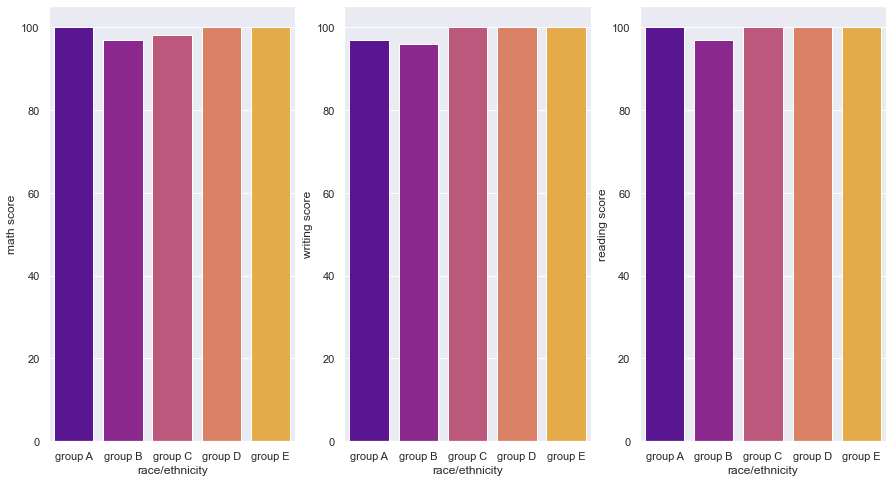

In [168]:
#Find the maximum marks for math, reading and writing for each group and plot them
df = student_performance.groupby('race/ethnicity').max()
df.drop(['gender',"parental level of education",'lunch','test preparation course'],axis=1,inplace = True)
print(df)
df['race/ethnicity'] = df.index
sns.set(rc = {'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 3)
sns.barplot(x = 'race/ethnicity',y = 'math score',data = df, palette ='plasma',ax=axes[0])
sns.barplot(x = 'race/ethnicity',y = 'writing score',data = df, palette ='plasma',ax=axes[1])
sns.barplot(x = 'race/ethnicity',y = 'reading score',data = df, palette ='plasma',ax=axes[2])

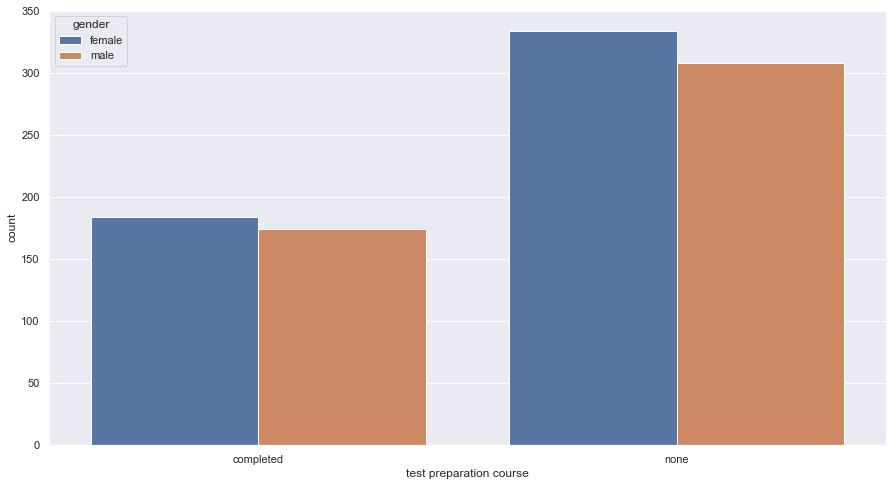

In [287]:
#Plot the count of students based on their gender and whether they have prepared for the test or not
df = student_performance.copy(deep = True)
df['count'] = df['race/ethnicity']
df.drop(['race/ethnicity', 'parental level of education', 'lunch', 'math score',
        'reading score', 'writing score'],inplace = True,axis = 1)
df = df.groupby(['gender','test preparation course']).count()

df.reset_index(inplace = True )
df
sns.barplot(x = 'test preparation course' ,y='count',hue = 'gender', data = df)

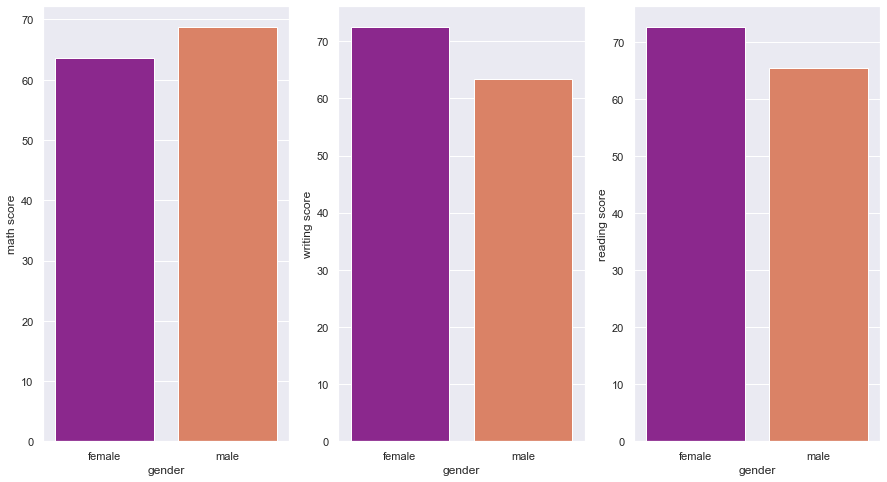

In [269]:
#Plot the scores in all three subjects based on their gender
df = student_performance.copy(deep = True)
df.drop(['race/ethnicity', 'parental level of education', 'lunch','test preparation course'],inplace = True,axis = 1)
df = df.groupby(['gender']).mean()
df['gender'] = df.index
sns.set(rc = {'figure.figsize':(15,8)})
f, axes = plt.subplots(1, 3)
sns.barplot(x = 'gender',y = 'math score',data = df, palette ='plasma',ax=axes[0])
sns.barplot(x = 'gender',y = 'writing score',data = df, palette ='plasma',ax=axes[1])
sns.barplot(x = 'gender',y = 'reading score',data = df, palette ='plasma',ax=axes[2])

Text(0.5, 1.0, 'student_performance correlation')

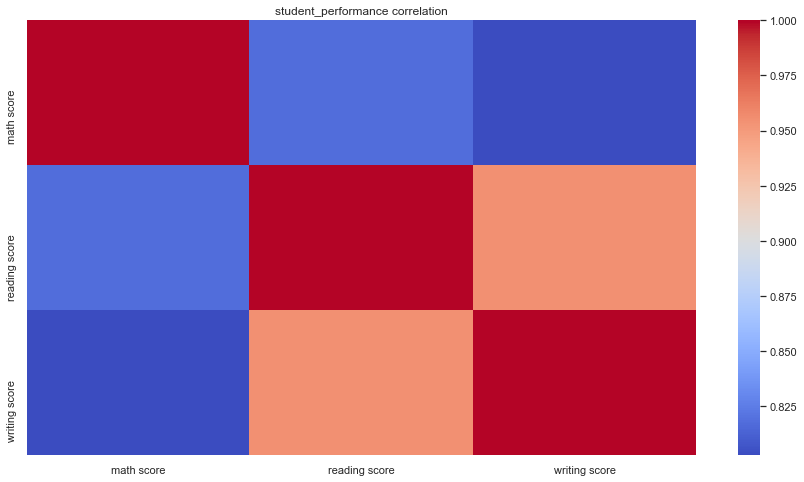

In [270]:
#Plot the relations between various columns based on the correlation coefficient
sns.heatmap(student_performance.corr(),cmap='coolwarm')
plt.title('student_performance correlation')

In [61]:
#Plot the scores of each student group wise and parental level of education
df = student_performance.copy(deep = True)
df.drop('gender',axis=1,inplace = True)
df = df.groupby(['race/ethnicity','parental level of education']).mean()

,race/ethnicity,parental level of education,math score,reading score,writing score
0,group A,associate's degree,61.000000,67.071429,63.571429
1,group A,bachelor's degree,67.166667,68.083333,68.333333
2,group A,high school,60.444444,62.888889,60.500000
3,group A,master's degree,57.666667,64.666667,67.666667
4,group A,some college,63.888889,65.777778,65.000000
5,group A,some high school,58.916667,62.083333,58.583333


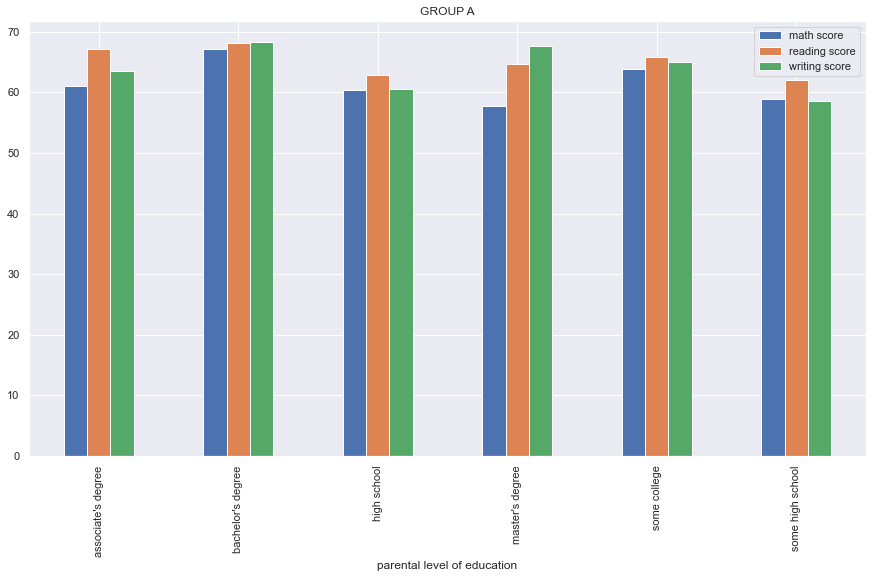

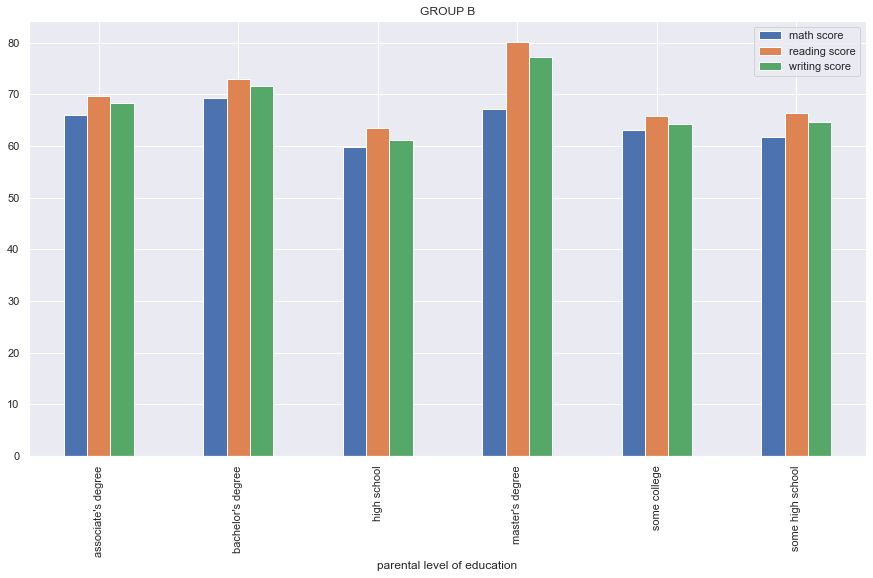

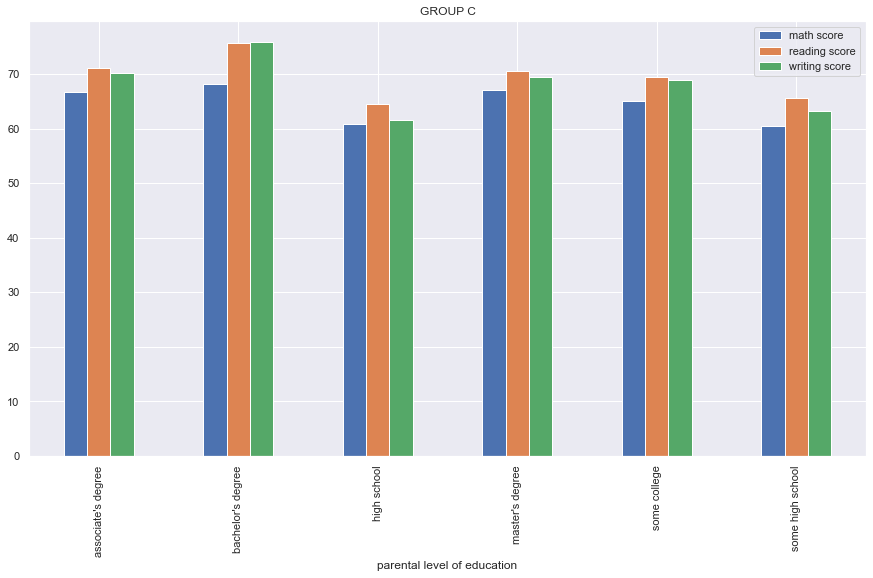

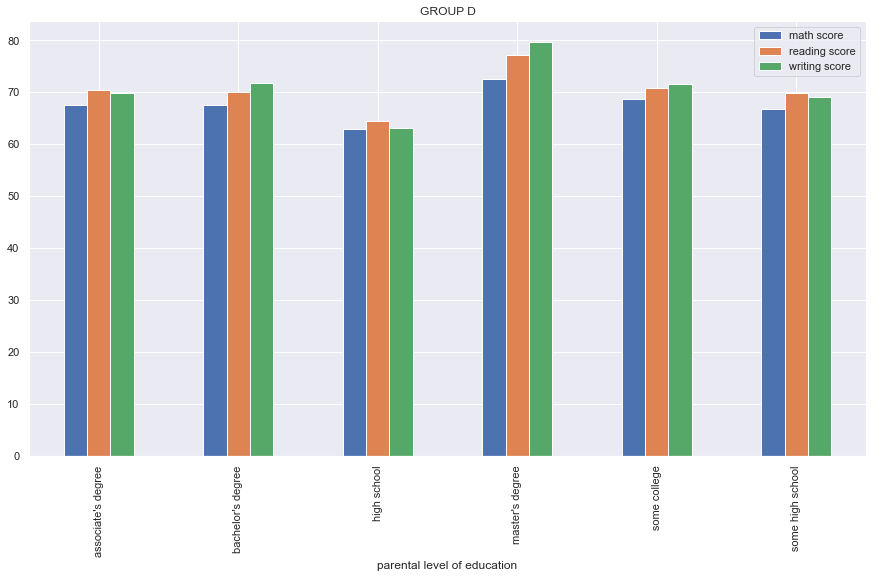

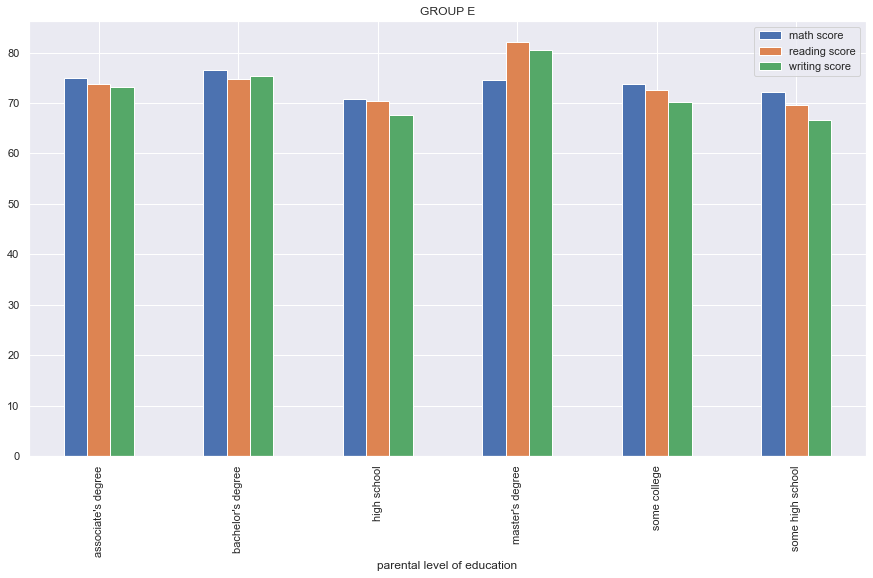

In [78]:
df1 = df.drop(['group B','group C','group D','group E']).reset_index()
df2 = df.drop(['group A','group C','group D','group E']).reset_index()
df3 = df.drop(['group B','group A','group D','group E']).reset_index()
df4 = df.drop(['group B','group C','group A','group E']).reset_index()
df5 = df.drop(['group B','group C','group D','group A']).reset_index()
df1.plot(x="parental level of education", y=["math score", "reading score", "writing score"], kind="bar",title = 'GROUP A')
df2.plot(x="parental level of education", y=["math score", "reading score", "writing score"], kind="bar",title = 'GROUP B')
df3.plot(x="parental level of education", y=["math score", "reading score", "writing score"], kind="bar",title = 'GROUP C')
df4.plot(x="parental level of education", y=["math score", "reading score", "writing score"], kind="bar",title = 'GROUP D')
df5.plot(x="parental level of education", y=["math score", "reading score", "writing score"], kind="bar",title = 'GROUP E')

ValueError: could not convert string to float: 'none'

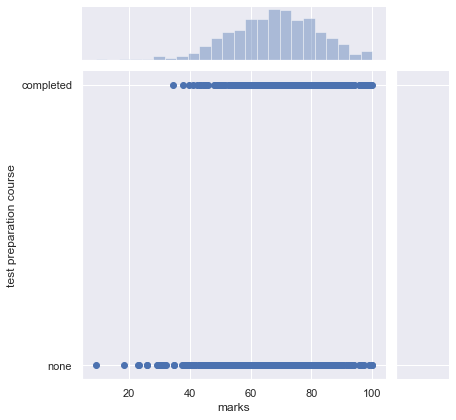

In [89]:
#Plot the relation between marks and preparation that will help understand them properly
df = student_performance.copy(deep = True)
df['marks'] = df[['math score','reading score','writing score']].mean(axis = 1)
sns.jointplot(x='marks',y='test preparation course',data = df)

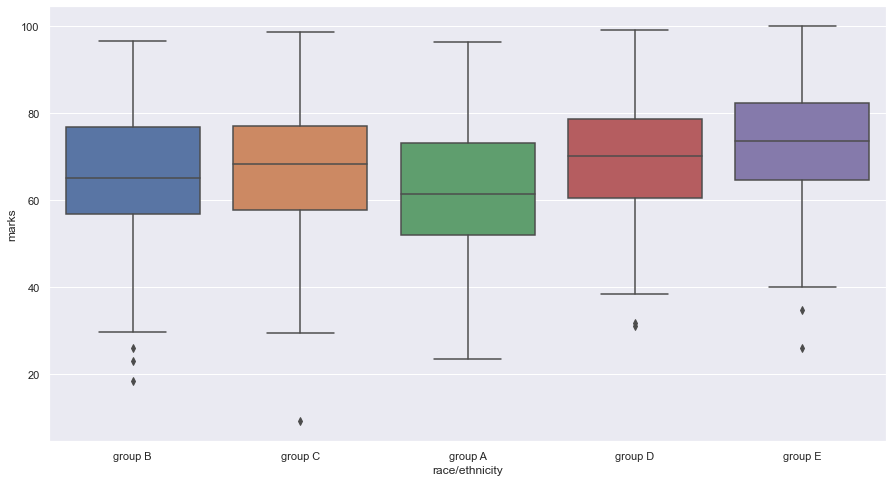

In [94]:
#Using any kind of plot, find whether the data is left skewed or right skewed based on scores of each subject
sns.boxplot(x='race/ethnicity',y='marks',data=df)

In [ ]:
#Predict the scores of every subject using various ML models and put forward the metrics to justify.

In [11]:
#Predict the race/ethnicity and test preparation using ML models and provide a classification report for the same.
df = student_performance.copy(deep = True)
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course']

In [12]:
def creating_dummies(columns):
    df_final=df
    i=0
    for fields in columns:        
        print(fields)
        df1=pd.get_dummies(df[fields],drop_first=True)
        
        df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([df,df_final],axis=1)
        
    return df_final

In [13]:
final_df = creating_dummies(columns)

gender
race/ethnicity
parental level of education
lunch
test preparation course


In [14]:
final_df

,math score,reading score,writing score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df.drop(['male','none'],axis=1), 
                                                    final_df[['male','none']], test_size=0.25, 
                                                    random_state=101)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

,male,none
545,1,0
298,1,0
109,0,1
837,0,0
194,0,0
...,...,...
971,1,0
267,0,1
772,0,0
172,0,1


In [21]:
y_train

,male,none
968,0,1
205,1,0
231,1,1
147,1,1
531,0,1
...,...,...
575,1,0
838,1,0
337,1,1
523,1,1


In [41]:
rfc_pred = rfc.predict(X_test)
pd.DataFrame(rfc_pred[:,0])

,0
0,0
1,0
2,1
3,0
4,0
...,...
245,1
246,0
247,0
248,0


In [35]:
y_test['male']

545    1
298    1
109    0
837    0
194    0
      ..
971    1
267    0
772    0
172    0
491    0
Name: male, Length: 250, dtype: uint8

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
#confusion matrix for predicted gender column
print(confusion_matrix(y_test['male'],pd.DataFrame(rfc_pred[:,0])))

[[113  27]
 [ 20  90]]


In [44]:
#confusion matrix for predicted test preparation course column
print(confusion_matrix(y_test['none'],pd.DataFrame(rfc_pred[:,1])))

[[ 28  64]
 [ 22 136]]
